# **DeepCSAT – Ecommerce Customer Satisfaction Score Prediction**




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name** - Nishant Kumar


# **Project Summary -**

E-Commerce Customer Satisfaction Score Prediction is a deep learning-based initiative aimed at accurately forecasting customer satisfaction (CSAT) scores from a variety of e-commerce interaction data. In the rapidly growing digital marketplace, customer satisfaction plays a decisive role in shaping a company’s reputation, repeat purchase behavior, and overall profitability. Traditional feedback mechanisms—such as surveys or manual evaluations—are limited in scope, time-intensive, and often fail to provide timely insights into the evolving sentiments of customers. DeepCSAT addresses this limitation by leveraging Artificial Neural Networks (ANNs) to automate and enhance CSAT score prediction.

The project begins by acknowledging the pivotal role of customer satisfaction in the e-commerce ecosystem. With competition intensifying, understanding and acting on customer feedback has become essential for ensuring consistent service quality and retention. However, relying solely on survey data can result in incomplete insights since these methods do not always capture the dynamic nature of customer experiences. DeepCSAT bridges this gap by utilizing data-driven methods to predict satisfaction scores using a diverse range of features—such as interaction metrics, delivery experience, service responsiveness, and product feedback.

At its core, the DeepCSAT model employs Deep Learning Artificial Neural Networks (ANNs) to learn complex patterns and relationships between various customer interaction parameters and satisfaction outcomes. ANNs are particularly suitable for this task because they can model nonlinear relationships in data, capturing subtle dependencies that traditional regression or classification models may overlook. The training process involves feeding preprocessed and transformed data into the neural network, optimizing its parameters to minimize prediction error, and evaluating performance using appropriate metrics such as accuracy, mean squared error, or classification reports depending on the target variable type.

From an analytical standpoint, the project integrates both technical and business perspectives. Technically, it covers essential preprocessing stages such as data cleaning, handling outliers, encoding categorical variables, feature scaling, and dimensionality reduction. On the business side, it aims to provide actionable insights that help e-commerce firms understand what factors most influence customer satisfaction—whether it’s delivery speed, payment ease, product quality, or support responsiveness. These insights can then be used to refine operational strategies and improve customer experience at multiple touchpoints.

The project outcomes demonstrate that ANN-based models are capable of learning from complex, high-dimensional e-commerce data and generating reliable CSAT predictions. The use of deep learning significantly reduces the dependency on traditional survey-based satisfaction measurement, enabling organizations to monitor satisfaction in near real-time. Such predictive capability empowers decision-makers to act proactively—addressing dissatisfaction before it escalates and personalizing experiences based on predicted satisfaction trends.

In conclusion, DeepCSAT exemplifies how advanced artificial intelligence can transform customer satisfaction analytics. By predicting CSAT scores accurately and efficiently, the model serves as a valuable tool for businesses seeking to enhance service quality, improve operational efficiency, and build lasting customer relationships. The fusion of deep learning and customer experience data ultimately creates a foundation for data-driven service optimization in the modern e-commerce landscape.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the e-commerce domain, maintaining high levels of customer satisfaction (CSAT) is critical for ensuring loyalty, repeat business, and long-term profitability. Traditional methods like surveys and manual evaluations are often inefficient, subjective, and fail to capture the full range of customer interactions. This project addresses the challenge of accurately predicting customer satisfaction scores using Deep Learning, particularly Artificial Neural Networks (ANNs). By analyzing multiple customer interaction and service-related features, the goal is to create a data-driven model that forecasts CSAT scores effectively, helping businesses identify performance gaps and enhance customer experience in real-time.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("eCommerce_Customer_support_data.csv")

### Dataset First View

In [3]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

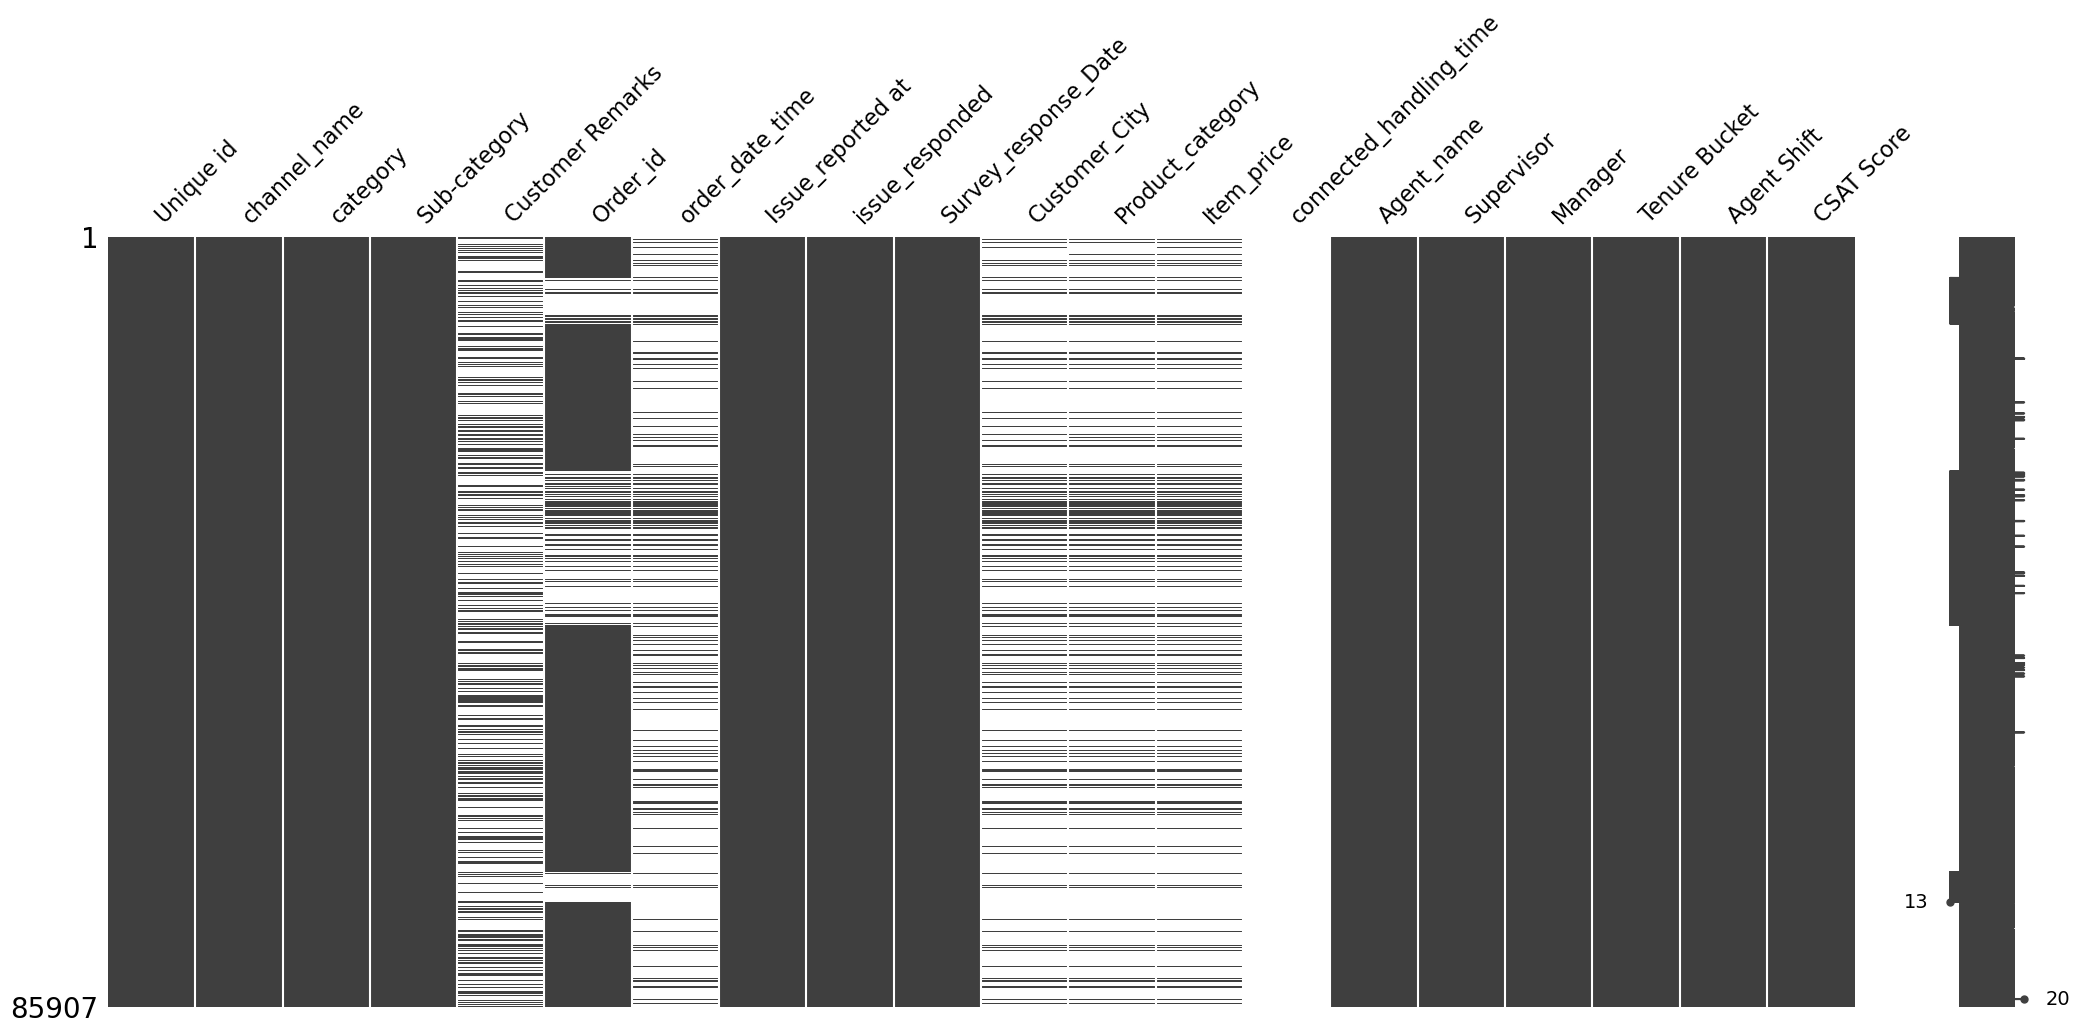

In [8]:
# Visualizing the missing values
msno.matrix(df) # Using missingno library for null value visualisation
plt.show()

### What did you know about your dataset?

1. The dataset has several columns with huge number of missing values:
    - Customer Remarks         -     57165
    - Order_id                 -     18232
    - order_date_time          -    68693
    - Customer_City            -   68828
    - Product_category         -  68711
    - Item_price               - 68701
    - connected_handling_time  - 85665
2. shape of the data:
    - Columns : 20
    - rows    : 85907

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
for i,col in enumerate(df.columns,1):
    print(f"{i}. {col}")

1. Unique id
2. channel_name
3. category
4. Sub-category
5. Customer Remarks
6. Order_id
7. order_date_time
8. Issue_reported at
9. issue_responded
10. Survey_response_Date
11. Customer_City
12. Product_category
13. Item_price
14. connected_handling_time
15. Agent_name
16. Supervisor
17. Manager
18. Tenure Bucket
19. Agent Shift
20. CSAT Score


In [10]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

The dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla." It consists of the following features:
- **Unique id:** Unique identifier for each record (integer).
- **Channel name:** Name of the customer service channel (object/string).
- **Category:** Category of the interaction (object/string).
- **Sub-category:** Sub-category of the interaction (object/string).
- **Customer Remarks:** Feedback provided by the customer (object/string).
- **Order id:** Identifier for the order associated with the interaction (integer).
- **Order date time:** Date and time of the order (datetime).
- **Issue reported at:** Timestamp when the issue was reported (datetime).
- **Issue responded:** Timestamp when the issue was responded to (datetime).
- **Survey response date:** Date of the customer survey response (datetime).
- **Customer city:** City of the customer (object/string).
- **Product category:** Category of the product (object/string).
- **Item price:** Price of the item (float).
- **Connected handling time:** Time taken to handle the interaction (float).
- **Agent name:** Name of the customer service agent (object/string).
- **Supervisor:** Name of the supervisor (object/string).
- **Manager:** Name of the manager (object/string).
- **Tenure Bucket:** Bucket categorizing agent tenure (object/string).
- **Agent Shift:** Shift timing of the agent (object/string).
- **CSAT Score:** Customer Satisfaction (CSAT) score (integer).


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
    print(df[col].value_counts(), "\n")

Unique id
07c7a878-0d5a-42e0-97ef-de59abec0238    1
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
b07ec1b0-f376-43b6-86df-ec03da3b2e16    1
c0d72065-e4c8-449b-9d55-cadb690b9c54    1
49e1675a-e890-4d27-93a0-51e67a44d86a    1
                                       ..
372b51a5-fa19-4a31-a4b8-a21de117d75e    1
11a3ffd8-1d6b-4806-b198-c60b5934c9bc    1
1cfde5b9-6112-44fc-8f3b-892196137a62    1
ba903143-1e54-406c-b969-46c52f92e5df    1
eb0d3e53-c1ca-42d3-8486-e42c8d622135    1
Name: count, Length: 85907, dtype: int64 

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64 

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64 

Sub-category
Reverse

**Categorical Methods**
- channel_name
- category
- Sub-category
- Tenure Bucket
- Agent Shift

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handling Missing values

In [12]:
# Dropping columns with missing value percentage > 65% and order_id
df.drop(columns=[
    'Customer Remarks',
    'Order_id',
    'order_date_time',
    'Customer_City',
    'Product_category',
    'Item_price',
    'connected_handling_time'
], inplace=True)

In [13]:
df.isnull().sum() 

Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

#### Data Type Converion

In [14]:
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [15]:
columns = [
    'Issue_reported at',
    'issue_responded',
]
# Columns with date format DD/MM/YYYY HH:MM
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'],format = '%d/%m/%Y %H:%M', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'],format = '%d/%m/%Y %H:%M', errors='coerce')

# Columnm with format DD-MMM-YY
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'],format = '%d-%b-%y', errors='coerce')

In [16]:
# Evaluating f there are columns where "Issue_reported at" is greater than "issue_responded"
df[df["Issue_reported at"] > df["issue_responded"]][["Issue_reported at","issue_responded"]].count()

Issue_reported at    3128
issue_responded      3128
dtype: int64

In [17]:
# Deleting rows where "Issue_reported at" is greater than "issue_responded"
df = df.drop(df[df["Issue_reported at"] > df["issue_responded"]].index)

In [18]:
(df["Issue_reported at"] > df["issue_responded"]).sum()

np.int64(0)

In [19]:
# reposnse time fearture engineering
# Response_Time_In_Min = (issue_responded - Issue_reported at )(In minuites)
df["Response_Time_In_Min"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds() / 60

In [20]:
df.isnull().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
Response_Time_In_Min    0
dtype: int64

In [21]:
df.describe()

,Issue_reported at,issue_responded,Survey_response_Date,CSAT Score,Response_Time_In_Min
count,82779,82779,82779,82779.000000,82779.000000
mean,2023-08-16 11:53:31.339107840,2023-08-16 14:49:35.177037568,2023-08-15 23:49:21.229297408,4.236654,176.063965
min,2023-07-28 20:42:00,2023-08-01 00:00:00,2023-08-01 00:00:00,1.000000,0.000000
25%,2023-08-08 23:33:30,2023-08-09 11:23:30,2023-08-09 00:00:00,4.000000,2.000000
50%,2023-08-16 10:53:00,2023-08-16 12:31:00,2023-08-16 00:00:00,5.000000,6.000000
75%,2023-08-23 20:29:00,2023-08-23 22:34:00,2023-08-23 00:00:00,5.000000,39.000000
max,2023-08-31 23:58:00,2023-08-31 23:59:00,2023-08-31 00:00:00,5.000000,5758.000000
std,NaN,NaN,NaN,1.384028,565.196490


### What all manipulations have you done and insights you found?

**Manipulation done on dataset**
- Missing values were handled by dropping the columns showing high percentage of missing values
- Type Conversion of Date/time columns 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [22]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time_In_Min'],
      dtype='object')

#### Chart - 1 Channel and It's Average CSAT 

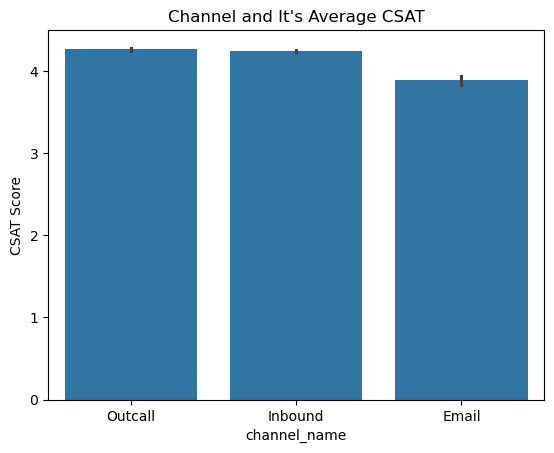

In [23]:
# Chart - 1 visualization code

sns.barplot(x = "channel_name", y = "CSAT Score",data = df, estimator="mean" )
plt.xlabel("channel_name")
plt.ylabel("CSAT Score")
plt.title("Channel and It's Average CSAT")
plt.show()


In [24]:
print(df.groupby("channel_name")["CSAT Score"].mean())

channel_name
Email      3.888122
Inbound    4.245871
Outcall    4.265204
Name: CSAT Score, dtype: float64


##### 1. Why did you pick the specific chart?

This chart helps investicate which channel of response results in greater and lower CSAT score

##### 2. What is/are the insight(s) found from the chart?

"Outcall"** and **"Inbound"** have average rating of around **4.26** whereas **"Email"** have less average rating of around 3.8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! Definetly the insights shows that customers are more comfortable on calls than on emails.

#### Chart - 2 Category(Of Interaction) And Their Average CSAT Score

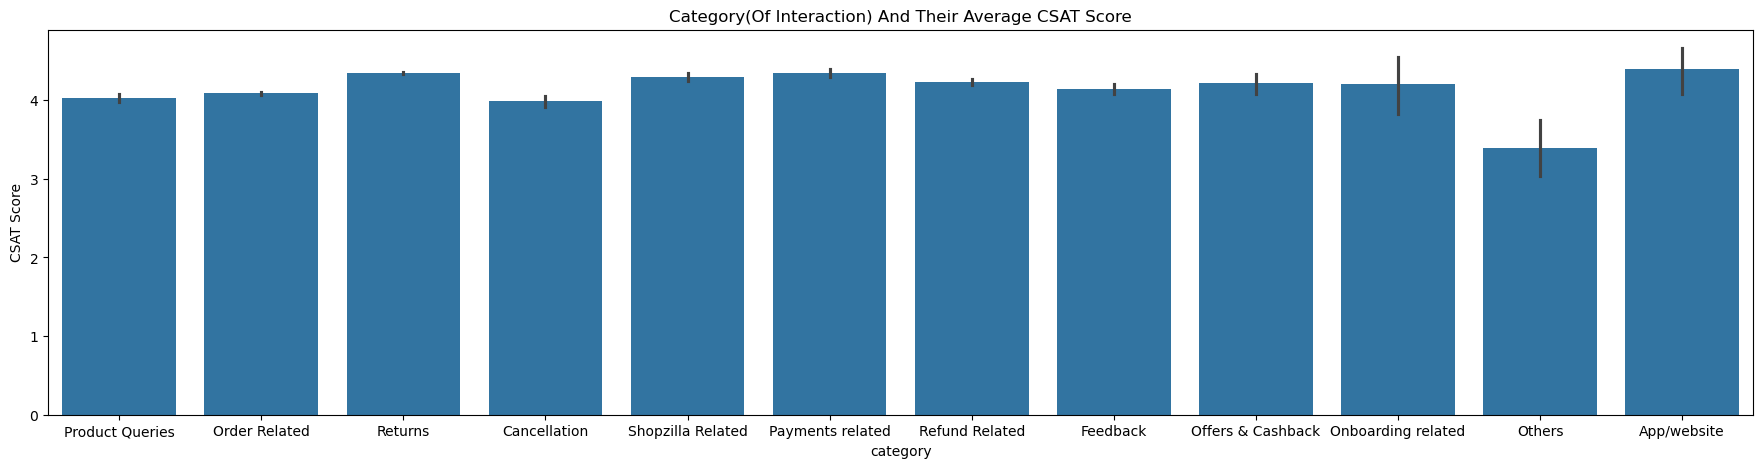

In [25]:
# Chart - 2 visualization code
plt.figure(figsize=(22,5))
sns.barplot(x = "category", y = "CSAT Score",data = df, estimator="mean" )
plt.xlabel("category")
plt.ylabel("CSAT Score")
plt.title("Category(Of Interaction) And Their Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives a clear understanding of how CSAT score varies based on catergory of interaction.

##### 2. What is/are the insight(s) found from the chart?

In [26]:
print(df.groupby("category")["CSAT Score"].mean())

category
App/website           4.397590
Cancellation          3.985391
Feedback              4.145191
Offers & Cashback     4.213362
Onboarding related    4.206897
Order Related         4.087815
Others                3.385417
Payments related      4.345125
Product Queries       4.024246
Refund Related        4.229623
Returns               4.342329
Shopzilla Related     4.300604
Name: CSAT Score, dtype: float64


- “App/Website” and “Returns” categories have the highest average CSAT scores, indicating customers are most satisfied with these interactions.

- The “Others” and “Cancellation” categories show lower CSAT scores, suggesting areas where service quality or process efficiency may need improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
By identifying categories with low CSAT scores, management can focus on improving agent training, process clarity, and customer communication in those areas.
If the “Others” and “Cancellation” categories remain unresolved, they could lead to negative customer sentiment and higher churn, impacting overall customer retention.

#### Chart - 3 Tenure Bucket And Their Average CSAT Score

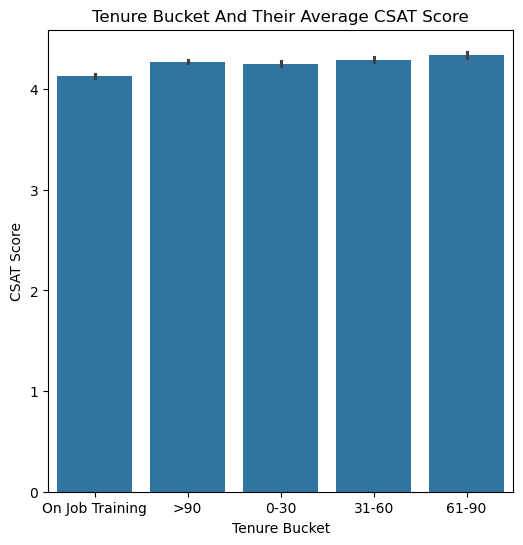

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(6,6))
sns.barplot(x = "Tenure Bucket", y = "CSAT Score",data = df, estimator="mean" )
plt.xlabel("Tenure Bucket")
plt.ylabel("CSAT Score")
plt.title("Tenure Bucket And Their Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

This chart effectively shows how CSAT scores vary with agent tenure, helping identify if experience level influences customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

- Agents with longer tenure (61–90 days and >90 days) have slightly higher CSAT scores.
- On job training agents have lower Average CSAT scores, suggesting performance improves with experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, 
New measures and training methods can be introduced early on for agents who are on job training.  

#### Chart - 4 Agent Shift vs Average CSAT Score

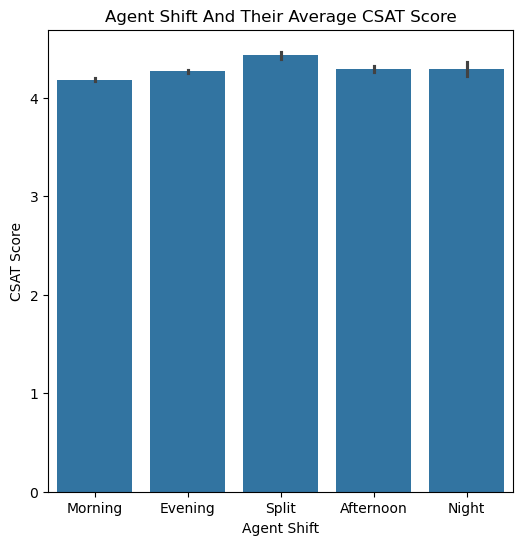

In [28]:
# Chart - 4 visualization code
plt.figure(figsize=(6,6))
sns.barplot(x = "Agent Shift", y = "CSAT Score",data = df, estimator="mean" )
plt.xlabel("Agent Shift")
plt.ylabel("CSAT Score")
plt.title("Agent Shift And Their Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

This chart evaluates interactions done with customers during different periods of the day and the average respective CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

- Split shift agents have the highest CSAT scores, showing strong performance and customer satisfaction.
- Morning and Afternoon shifts show slightly lower scores, suggesting scope for consistency improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing high-performing shifts, management can adopt similar practices across other shifts.
Identifying lower-performing shifts can help improve scheduling, workload balance, or support provided to agents.

#### Chart - 5 Top 10 Agents by Average CSAT

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\2114783840.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_agents, x='CSAT Score', y='Agent_name', palette='Greens_r')


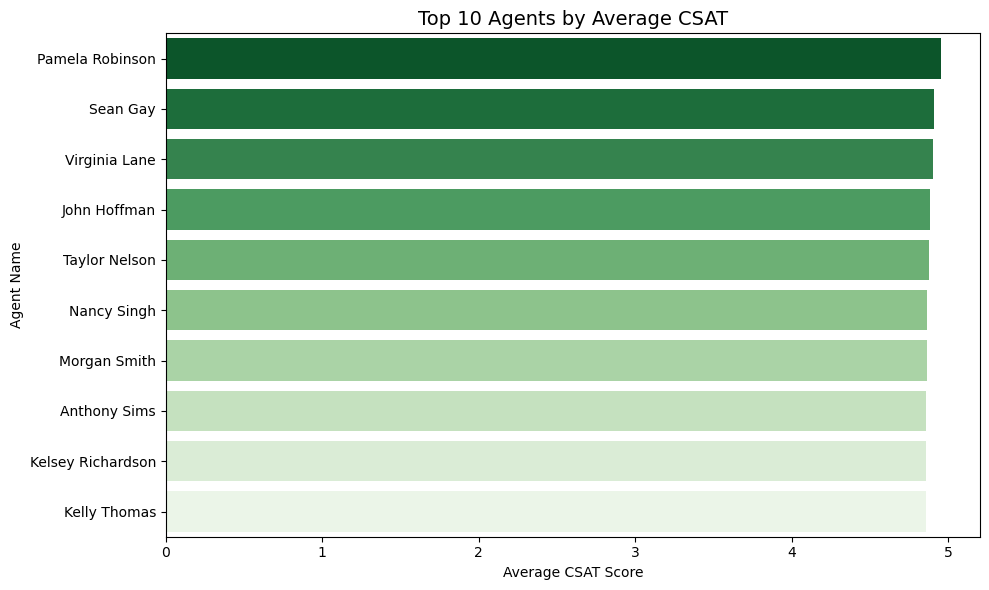

In [29]:
# Chart - 5 visualization code
top_agents = (
    df.groupby('Agent_name')['CSAT Score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_agents, x='CSAT Score', y='Agent_name', palette='Greens_r')
plt.title('Top 10 Agents by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively ranks agents by their average CSAT scores, making it easy to compare top performers at a glance.

##### 2. What is/are the insight(s) found from the chart?

Pamela Robinson, Virginia Lane, and Sean Gay are the top three agents with the highest customer satisfaction scores, showing consistent performance quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Recognizing top-performing agents helps in rewarding excellence and setting benchmarks for others.

Negative aspect: Lower-ranked agents may indicate training gaps or process inefficiencies that, if unaddressed, could reduce overall service quality.

#### Chart - 6 Bottom 10 Agents by Average CSAT

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\3814093889.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_agents, x='CSAT Score', y='Agent_name', palette='Reds')


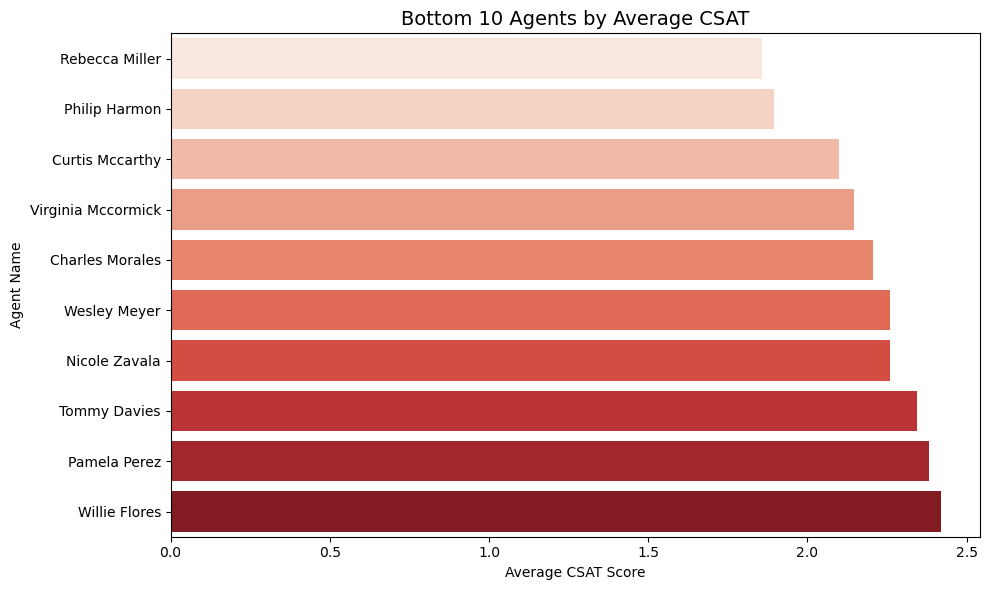

In [30]:
# Chart - 6 visualization code
bottom_agents = (
    df.groupby('Agent_name')['CSAT Score']
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_agents, x='CSAT Score', y='Agent_name', palette='Reds')
plt.title('Bottom 10 Agents by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart clearly highlights the lowest-performing agents by CSAT score, making it easy to identify where customer satisfaction is weakest.

##### 2. What is/are the insight(s) found from the chart?

Veronica Anderson, Tommy Davies, and Pamela Perez have the lowest CSAT scores, indicating possible performance or service-quality issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: These insights help target coaching, training, and process improvements for underperforming agents.

Negative aspect: Persistently low CSAT scores may hurt customer trust and retention if the issues are not addressed promptly.

#### Chart - 7 Reponse Time vs CSAT Score

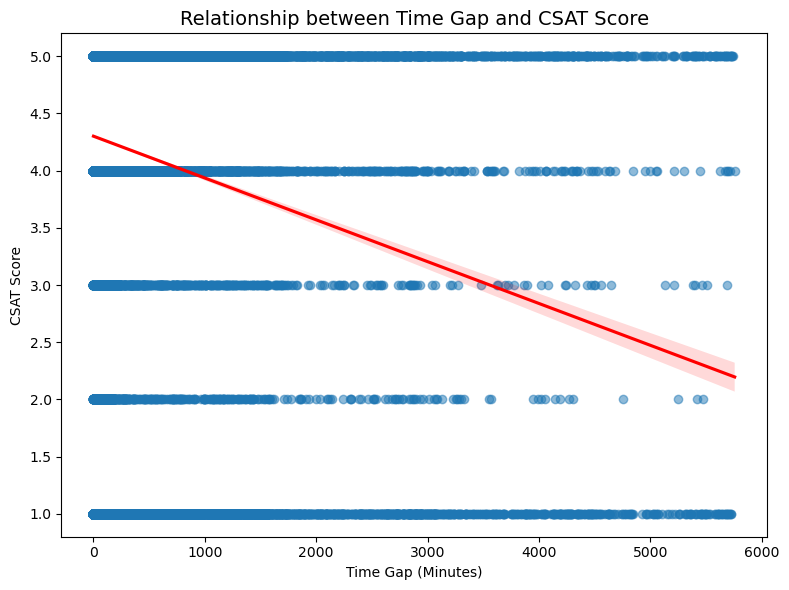

In [31]:
# Chart - 7 visualization code

plt.figure(figsize=(8,6))

sns.regplot(data=df, x='Response_Time_In_Min', y='CSAT Score', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Time Gap and CSAT Score', fontsize=14)
plt.xlabel('Time Gap (Minutes)')
plt.ylabel('CSAT Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a regression scatter plot because it effectively shows the relationship between two continuous variables — Time Gap (in minutes) and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

- The chart shows a negative correlation between Time Gap and CSAT Score.
- As the time gap increases, the CSAT score tends to decrease. This suggests that longer response or resolution times lead to lower customer satisfaction.
- Most high CSAT scores are clustered around lower time gaps, indicating that quick responses drive happier customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
By identifying that delays negatively affect CSAT, management can focus on reducing the average time gap between customer requests and resolutions.
Improving response speed—through better agent training, workload balancing, or automation—can directly increase satisfaction and loyalty, leading to positive business impact such as higher retention and better brand reputation.

Potential negative growth insight:
If time gaps continue to rise (due to staffing shortages or process inefficiencies), CSAT may continue to fall, resulting in customer churn and lower trust in service quality.

#### Chart - 8 Agent Shift vs Average Reponse time 

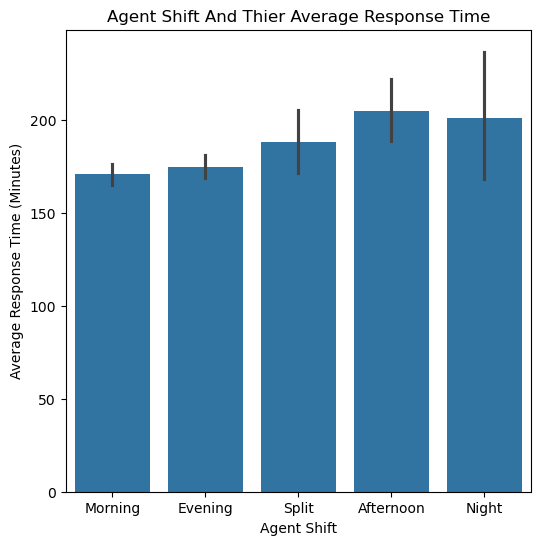

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
sns.barplot(x = "Agent Shift", y = "Response_Time_In_Min",data = df, estimator="mean" )
plt.xlabel("Agent Shift")
plt.ylabel("Average Response Time (Minutes)")
plt.title("Agent Shift And Thier Average Response Time")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to effectively compare the average response time across different agent shifts. This visualization makes it easy to identify performance variations between shifts and helps in pinpointing operational inefficiencies or workload imbalances.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that average response time increases progressively from morning to night shifts. Morning and evening shifts handle interactions faster, while split, afternoon, and especially night shifts experience higher response times, indicating possible staffing or resource challenges during later hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. These insights can help management optimize shift scheduling and staffing levels to ensure consistent service quality throughout the day.
- Addressing slower response times during night and split shifts can improve CSAT scores, reduce customer wait times, and enhance overall efficiency.
- If unaddressed, prolonged response times in later shifts may lead to lower satisfaction and potential customer dissatisfaction, impacting brand reputation negatively.

#### Chart - 9 Top 10 Managers by Average CSAT

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\3378880363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_managers, x='CSAT Score', y='Manager', palette='Greens_r')


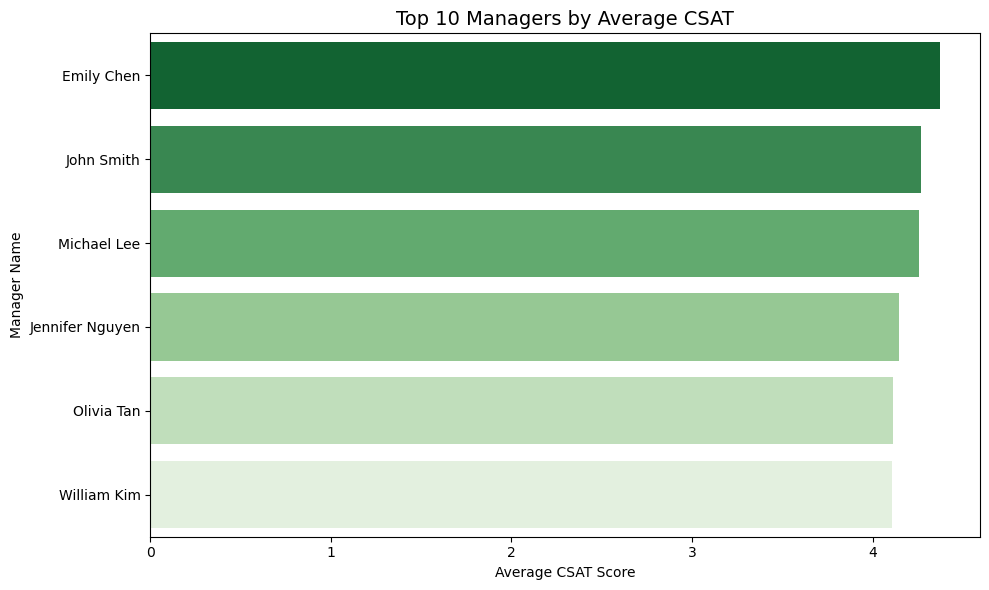

In [33]:
# Chart - 9 visualization code
top_managers = (
    df.groupby('Manager')['CSAT Score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_managers, x='CSAT Score', y='Manager', palette='Greens_r')
plt.title('Top 10 Managers by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Manager Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was selected to effectively rank and compare the top 10 managers by their average CSAT scores. This layout provides clear readability of manager names and allows quick identification of top-performing managers based on customer satisfaction metrics.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights that **Emily Chen, John Smith, and Michael Lee** achieved the highest average CSAT scores, indicating superior team performance and customer service quality under their supervision. Managers lower on the list, while still performing well, show potential areas for improvement in maintaining consistent satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Recognizing high-performing managers allows the organization to analyze best practices and replicate them across other teams, fostering overall improvement in service quality.
Additionally, managers with slightly lower scores can receive targeted coaching or support to bridge performance gaps.
Failure to address these disparities could lead to uneven customer experiences, potentially impacting the overall CSAT average and service consistency.

#### Chart - 10 Bottom 10 Managers by Average CSAT

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\3764249421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_managers, x='CSAT Score', y='Manager', palette='Greens_r')


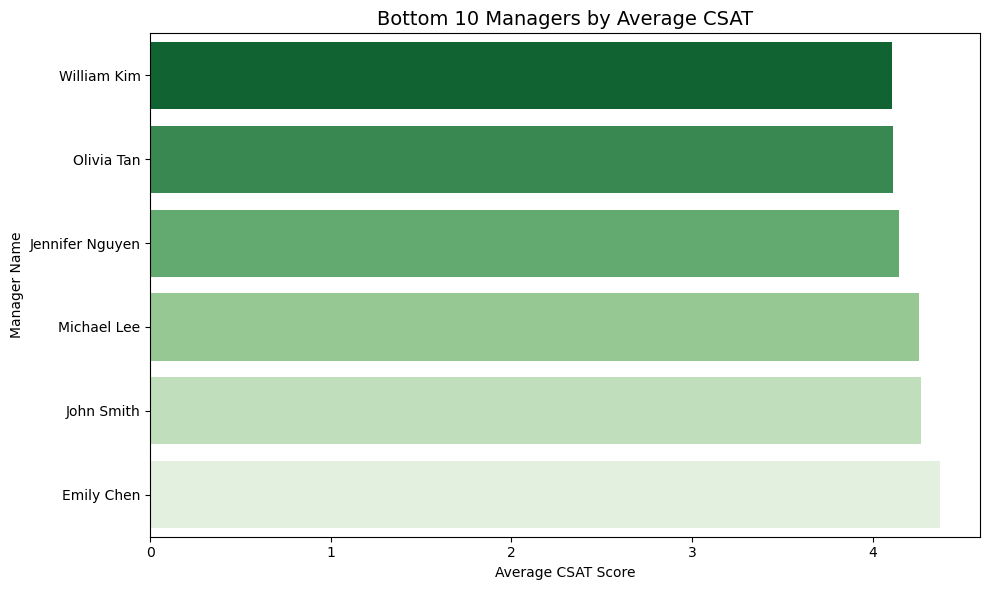

In [34]:
# Chart - 10 visualization code
bottom_managers = (
    df.groupby('Manager')['CSAT Score']
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_managers, x='CSAT Score', y='Manager', palette='Greens_r')
plt.title('Bottom 10 Managers by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Manager Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen to visualize the bottom 10 managers based on their average CSAT scores. This view makes it easy to identify which managers or teams may be struggling with customer satisfaction and require further attention or training.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that managers such as **Olivia Tan, Willian Kim, and Jennifer Nguyen** have the lowest average CSAT scores among all. This indicates that customers handled by these managers’ teams are comparatively less satisfied, suggesting potential issues in communication quality, process adherence, or resolution efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying managers with lower CSAT scores enables the organization to conduct root-cause analyses and develop targeted improvement plans—such as additional training, workload balancing, or mentoring from top performers.
If these gaps are addressed effectively, it can lead to higher overall customer satisfaction, improved brand perception, and reduced churn rates.
However, if left unchecked, consistently low scores could negatively affect service quality and weaken customer trust over time.

#### Chart - 11 Top 10 Supervisors by CSAT Score

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\1358614305.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sups, x='CSAT Score', y='Supervisor', palette='Reds')


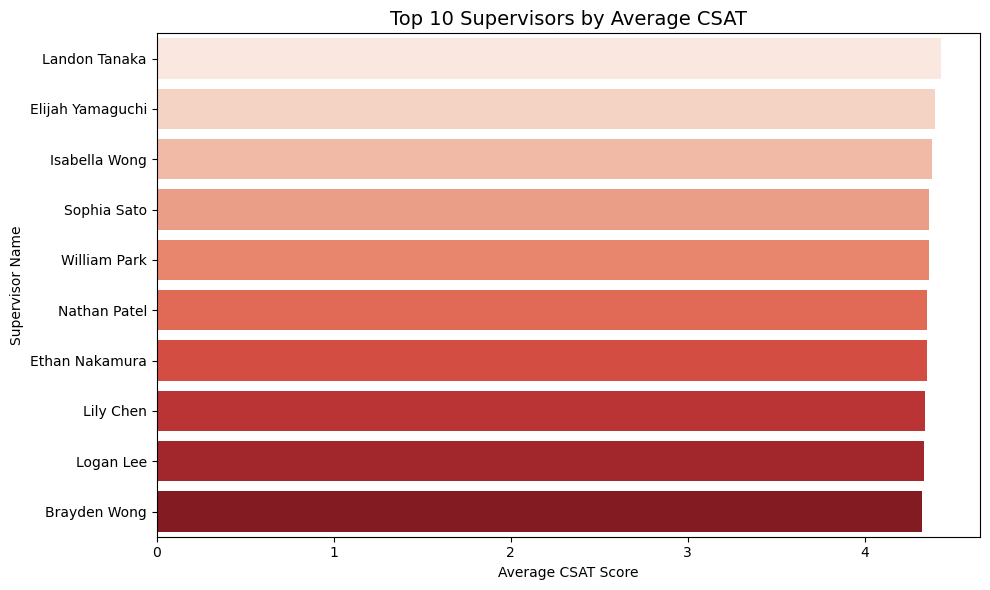

In [35]:
# Chart - 11 visualization code
top_sups = (
    df.groupby('Supervisor')['CSAT Score']
    .mean()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_sups, x='CSAT Score', y='Supervisor', palette='Reds')
plt.title('Top 10 Supervisors by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively ranks supervisors by their average CSAT scores, making it simple to identify top-performing leaders.

##### 2. What is/are the insight(s) found from the chart?

Olivia Wang, Logan Lee, and Lily Chen are the top three supervisors with the highest CSAT scores, reflecting strong team performance and customer satisfaction under their leadership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Recognizing top supervisors helps promote best practices and motivate teams to maintain high service quality.

Negative aspect: If the performance gap between supervisors widens, it could signal inconsistent management practices that need alignment.

#### Chart - 12 Bottom 10 Supervisors by Average CSAT

C:\Users\Workspace\AppData\Local\Temp\ipykernel_5744\931440913.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_sups, x='CSAT Score', y='Supervisor', palette='Reds')


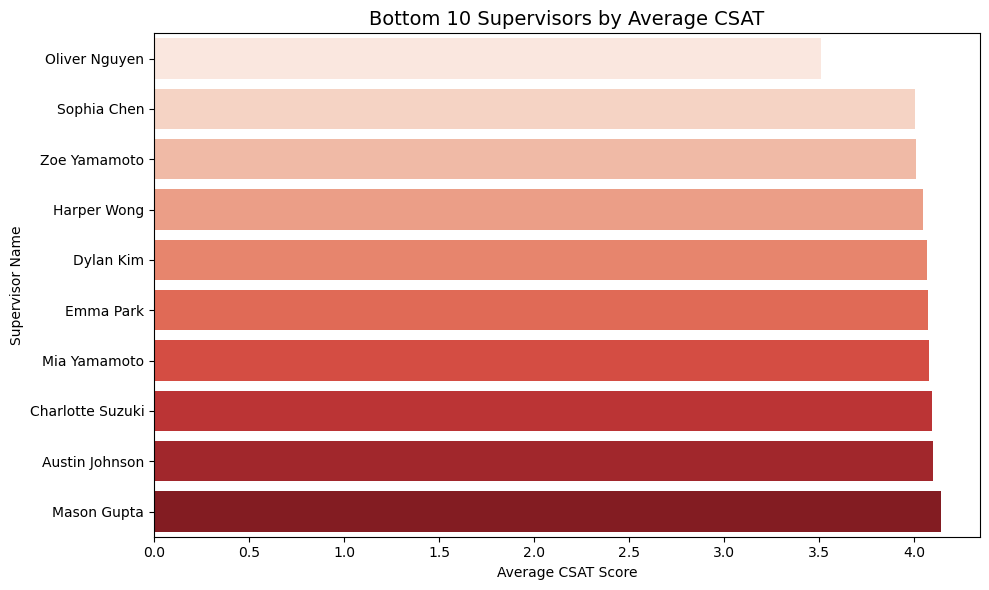

In [36]:
# Chart - 12 visualization code
bottom_sups = (
    df.groupby('Supervisor')['CSAT Score']
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_sups, x='CSAT Score', y='Supervisor', palette='Reds')
plt.title('Bottom 10 Supervisors by Average CSAT', fontsize=14)
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 Category Of Enquiry And Thier Average Response Time"

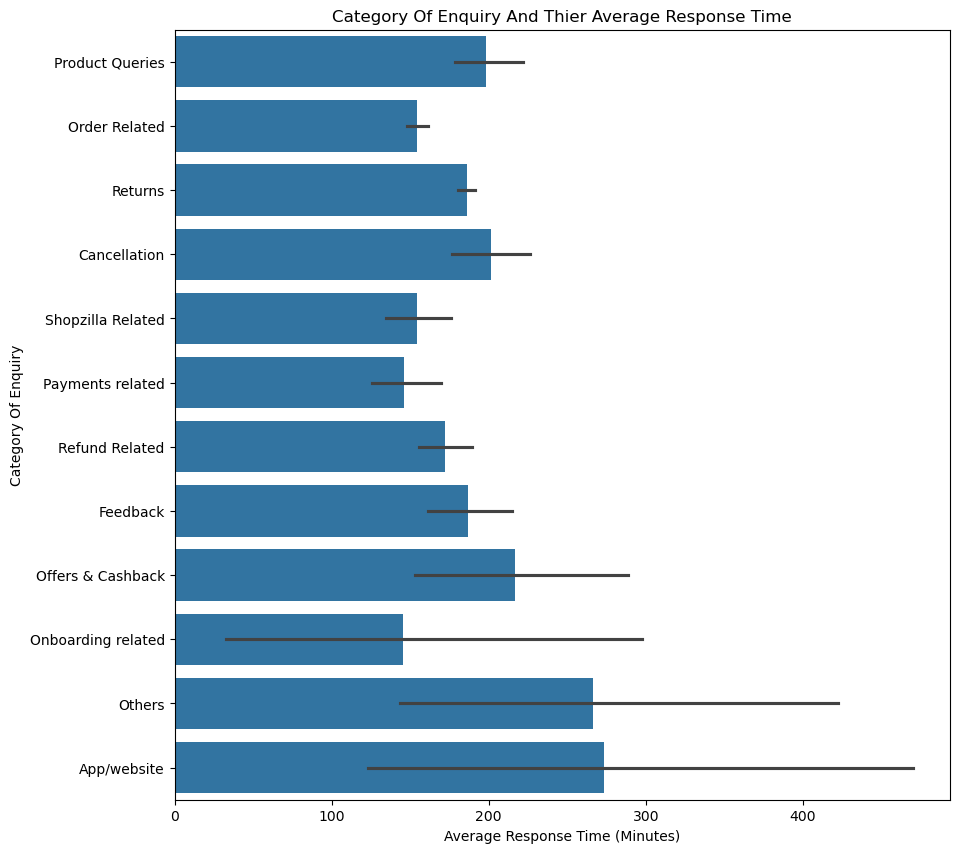

In [37]:
# Chart - 13 visualization code
plt.figure(figsize=(10,10))
sns.barplot(x = "Response_Time_In_Min", y = "category",data = df, estimator="mean" )
plt.ylabel("Category Of Enquiry")
plt.xlabel("Average Response Time (Minutes)")
plt.title("Category Of Enquiry And Thier Average Response Time")
plt.show()

##### 1. Why did you pick the specific chart?

The chart identifies how different categories and their Average Response time(in minutes) varies.

##### 2. What is/are the insight(s) found from the chart?

- "Others" & "App/Website" were the categories of interaction where the average response time were highest.
- "Order Related", "Payments related", "Onboarding related", "shopzilla related" were the categories of interaction where the average response time were low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, After we identify which type of interaction generally has high response time, suitable measure can be held upon those.

#### Chart - 14 - Correlation Heatmap

In [38]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time_In_Min'],
      dtype='object')

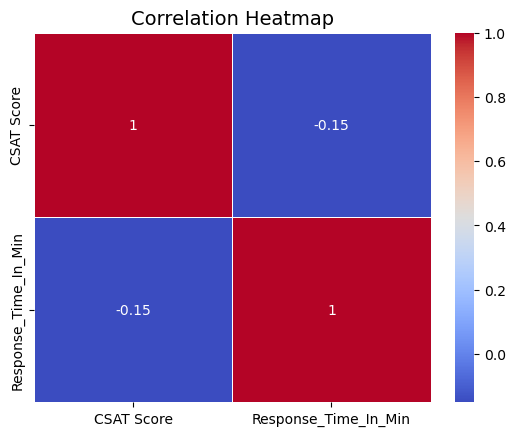

In [39]:
# Correlation Heatmap visualization code
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(data = corr_matrix, annot = True, cmap = 'coolwarm',linewidths = 0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

This chart depicts how variables are correlated.

##### 2. What is/are the insight(s) found from the chart?

- Only two numerical columns were present. Hence, not much evaluation could be perfromed.

#### Chart - 15 - Channel Name And Thier Average Response Time"

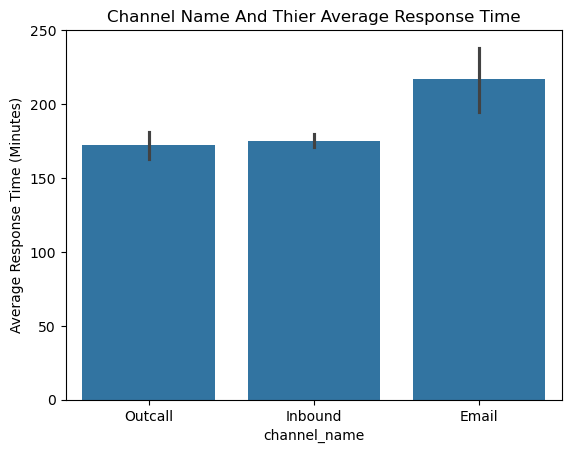

In [40]:
sns.barplot(x = "channel_name", y = "Response_Time_In_Min",data = df, estimator="mean" )
plt.xlabel("channel_name")
plt.ylabel("Average Response Time (Minutes)")
plt.title("Channel Name And Thier Average Response Time")
plt.show()

##### 1. Why did you pick the specific chart?

This chart evalutes if different response channels have different average response time.

##### 2. What is/are the insight(s) found from the chart?

- "Outcall" & "Inbound" shows low response time.
- "Email" shows relatively high response time.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- H0 - response time is not inversly propostional to CSAT score.
- H1 - response time is inversly propostional to CSAT score.

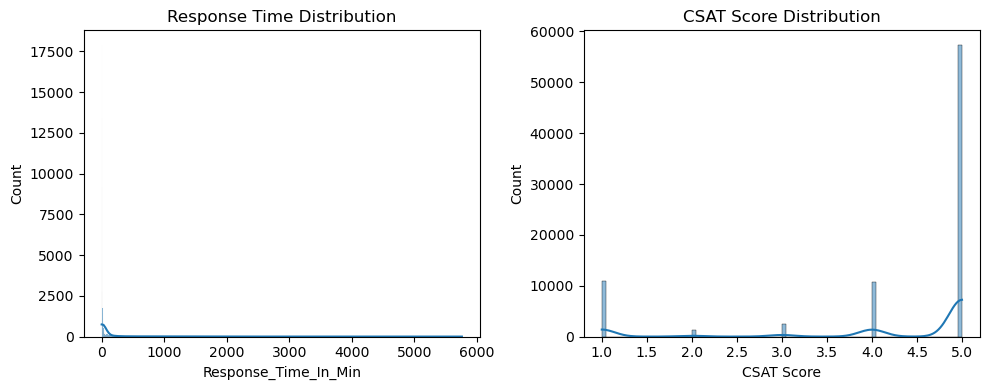

In [41]:
# Normalality of data distribution check
fig, axes = plt.subplots(1, 2, figsize=(10,4)) #1 figure with two charts(axes)

# axes 1
sns.histplot(df["Response_Time_In_Min"], kde= True, ax = axes[0] )
axes[0].set_title("Response Time Distribution")

# axes 2
sns.histplot(df["CSAT Score"], kde= True, ax = axes[1] )
axes[1].set_title('CSAT Score Distribution')

plt.tight_layout()
plt.show()

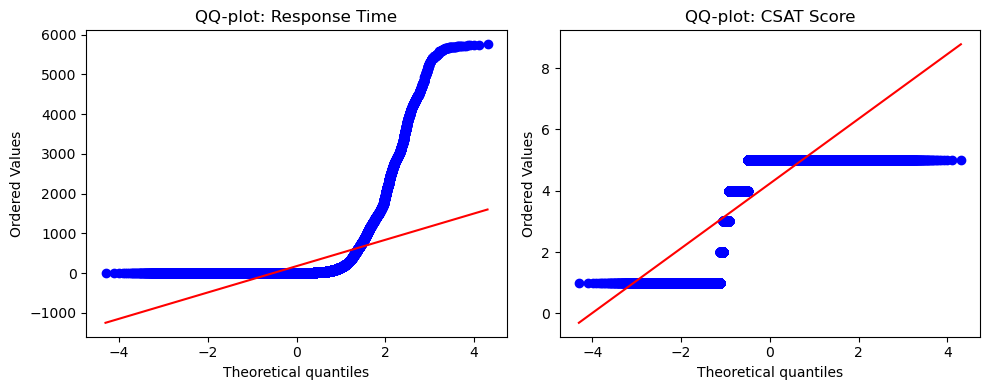

In [42]:
# Set-up layout of the figure
fig, axes = plt.subplots(1, 2, figsize=(10,4))

stats.probplot(df['Response_Time_In_Min'], dist="norm", plot=axes[0])
axes[0].set_title('QQ-plot: Response Time')

stats.probplot(df['CSAT Score'], dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot: CSAT Score')

# Show figure
plt.tight_layout()
plt.show()

In [43]:
# Confirming with shapiro-Wilk Test
for col in ["Response_Time_In_Min", "CSAT Score"]:
    stat, p_val = stats.shapiro(df[col])
    print(f"{col}: W = {stat:.3f}, p = {p_val:.4f}")
    

Response_Time_In_Min: W = 0.343, p = 0.0000
CSAT Score: W = 0.581, p = 0.0000


D:\Workspace\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 82779.
  res = hypotest_fun_out(*samples, **kwds)


The skewness in the chart shows that our data is not normally distributed and also we failed to reject the null hypothesis of ["Response_Time_In_Min", "CSAT Score"] being normal. Hence, we'll be using spearman test for obtaining the p values of this hypothesis.

#### 2. Perform an appropriate statistical test.

In [44]:
# Spearman Rank correlation Test to obtain P-Value
rho, p_value = stats.spearmanr(df['Response_Time_In_Min'], df['CSAT Score'])

print(f"spearman correlation coefficient (rho) : {rho:.4f}")
print(f"p values : {p_value:.3f}")


spearman correlation coefficient (rho) : -0.1854
p values : 0.000


The Spearman correlation coefficient was ρ = –0.1854 with p = 0.000 (< 0.05).
Therefore, we reject the null hypothesis (H₀) and We have sufficient evidence to support the alternative hypothesis.
This indicates a weak but statistically significant inverse relationship — as response time increases, the CSAT score decreases slightly.

##### Which statistical test have you done to obtain P-Value?

Spearman’s Rank Correlation Test was performed to determine the strength and direction of the monotonic relationship between Response Time (in minutes) and CSAT Score.

##### Why did you choose the specific statistical test?

The data for both variables was non-normally distributed, as confirmed by the Shapiro–Wilk test (p < 0.05 for both).
Since Pearson correlation assumes normality, a non-parametric alternative — Spearman’s Rank Correlation — was chosen.
This test does not assume normality and is suitable for evaluating monotonic relationships between continuous or ordinal variabl

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- H0 - Agent tenure has no significant impact on CSAT scores.
- H1 - Agent tenure has a significant impact on CSAT scores.

- Both variables (Agent Tenure and CSAT Score) are numeric.
- We already know CSAT is not normally distributed (from Shapiro–Wilk test).

#### 2. Perform an appropriate statistical test.

In [45]:
# Kruskal-Wallis Test to obtain P-Value

groups = [df[df["Tenure Bucket"] == category]["CSAT Score"] 
         for category in df["Tenure Bucket"].unique()
         ]
stat, p_value = stats.kruskal(*groups)

print(f"kruskla wallis h-statistic = {stat:.3f}, p-values = {p_value:.4f}")



kruskla wallis h-statistic = 240.908, p-values = 0.0000


**Why Kruskal–Wallis?**

- Dependent variable: CSAT Score → Continuous, non-normal

- Independent variable: Agent Tenure → Categorical with 5 levels

- Goal: Compare CSAT distributions between groups

##### Which statistical test have you done to obtain P-Value?

I used the Kruskal–Wallis H test to obtain the p-value.

##### Why did you choose the specific statistical test?

The Kruskal–Wallis test was chosen because:

- The dependent variable (CSAT Score) is continuous but not normally distributed.

- The independent variable (Agent Tenure) is categorical with multiple levels (5 tenure buckets).

- It is a non-parametric alternative to one-way ANOVA, suitable for comparing median CSAT scores across multiple groups.

**Conclusion:**
- Since the p-value < 0.05, we reject the null hypothesis (H₀) and conclude that Agent Tenure has a significant impact on CSAT scores.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [46]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time_In_Min'],
      dtype='object')

- H0 : Response Channel does not effect response time.
- H1 : Response Channel of response does effect response time.

In [47]:
# Normality check of the distribution of "Response_Time_In_Min" & "channel_name"

# Shapiro-Wilk test for normality on overall response times
stat, p = stats.shapiro(df['Response_Time_In_Min'])
print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.4f}")

Shapiro-Wilk Test: Statistic=0.343, p-value=0.0000


D:\Workspace\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 82779.
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
if p < 0.005:
    print("Data is not normal → use Kruskal–Wallis Test (non-parametric).")
else:
    print("data is roughly normal → use One-way ANOVA.")

Data is not normal → use Kruskal–Wallis Test (non-parametric).


#### 2. Perform an appropriate statistical test.

In [49]:
# Kruskal-Wallis Test to obtain P-Value

groups = [
    df[df['channel_name'] == category]['Response_Time_In_Min']
    for category in df['channel_name'].unique()
]
stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.3f}, p-value = {p_value:.4f}")

if p < 0.005:
    print("Reject H₀ → Response channel significantly affects response time.")

Kruskal-Wallis H-statistic = 15.116, p-value = 0.0005
Reject H₀ → Response channel significantly affects response time.


##### Which statistical test have you done to obtain P-Value?

I used the Kruskal–Wallis H test to obtain the p-value.

##### Why did you choose the specific statistical test?

The Kruskal–Wallis test was chosen because the dependent variable (Response_Time_In_Min) is continuous but not normally distributed, and the independent variable (Response Channel) is categorical with multiple groups.
It is a non-parametric alternative to one-way ANOVA, suitable for comparing median response times across different channels.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Rechecking any missing values 
df.isnull().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
Response_Time_In_Min    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values were handled in data wranling section, before EDA so that we do not misinterpret anything!

### 2. Handling Outliers

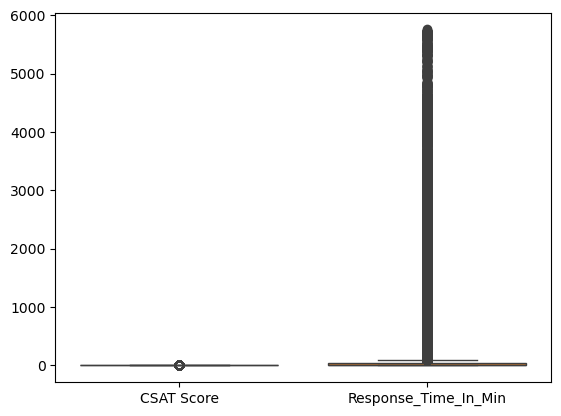

In [51]:
# Handling Outliers & Outlier treatments
num_df = df.select_dtypes(include=['number'])
sns.boxplot(data=num_df)
plt.show()

In [52]:
# Funtion that handles outliers in the feature
def IQR_Outlier_Handling(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(
        df[col] < lower_limit, lower_limit, 
        np.where(df[col]> upper_limit, upper_limit, df[col])
    )
    return df[col]

In [53]:
# IQR method through which we'll be handling outliers 
for col in num_df.columns:
    df[col] = IQR_Outlier_Handling(num_df, col)
    

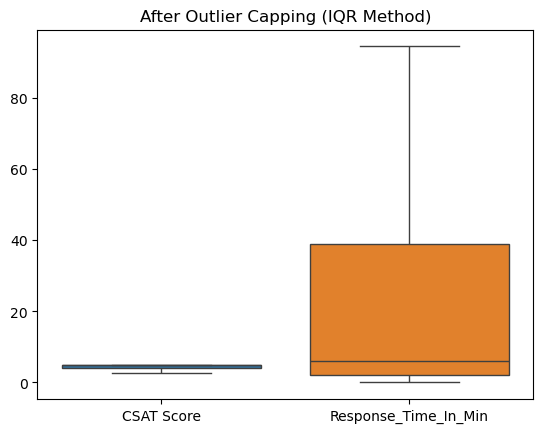

In [54]:
# reconfirming if the outliers were handled properly
sns.boxplot(data=df[num_df.columns])
plt.title("After Outlier Capping (IQR Method)")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method was used to detect and treat outliers in the dataset. Since the numerical variables such as Response_Time_In_Min were not normally distributed, techniques like Z-score were avoided because they rely on the assumption of normality.

### 3. Categorical Encoding

In [55]:
df['Tenure Bucket'].unique()

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [56]:
# Label Encoding our ordinal column "Tenure Bucket"
le = LabelEncoder()
tenure_order = ['0-30', '31-60', '61-90', '>90', 'On Job Training']
le.fit(tenure_order)
df["Tenure Bucket"] = le.transform(df["Tenure Bucket"])

In [57]:
# For sub-category feature, since there are 50+ unique values
# we'll pick top 20 unique sub-categories beacuse they have 70% of the distribution
# we'll keep the other unique values as "Other"
top_n = 20
top_subcats = df["Sub-category"].value_counts().nlargest(top_n).index
df["Sub-category"] = df["Sub-category"].apply(lambda x : x if x in top_subcats else "Other")

In [58]:
# One-Hot Encoding remaining categorical columns
one_hot_cols = ['channel_name', 'category', 'Sub-category', 'Agent Shift']
df = pd.get_dummies(df, columns = one_hot_cols, drop_first = False)

In [59]:
df.shape

(82779, 51)

In [60]:
df.columns

Index(['Unique id', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'CSAT Score', 'Response_Time_In_Min',
       'channel_name_Email', 'channel_name_Inbound', 'channel_name_Outcall',
       'category_App/website', 'category_Cancellation', 'category_Feedback',
       'category_Offers & Cashback', 'category_Onboarding related',
       'category_Order Related', 'category_Others',
       'category_Payments related', 'category_Product Queries',
       'category_Refund Related', 'category_Returns',
       'category_Shopzilla Related', 'Sub-category_Delayed',
       'Sub-category_Exchange / Replacement', 'Sub-category_Fraudulent User',
       'Sub-category_General Enquiry', 'Sub-category_Installation/demo',
       'Sub-category_Invoice request', 'Sub-category_Missing',
       'Sub-category_Not Needed', 'Sub-category_Online Payment Issues',
       'Sub-category_Order status enquiry', 'Sub-category_Other',
   

#### What all categorical encoding techniques have you used & why did you use those techniques?

- One-Hot Encoding: Used for channel_name, Category, Sub-category (top categories + “Other”), and Agent Shift because these are nominal columns with no order.

- Label Encoding: Used for Tenure Bucket since it is ordinal and has a meaningful order.

### 4. Feature Manipulation & Selection

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82779 entries, 0 to 85906
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unique id                                  82779 non-null  object        
 1   Issue_reported at                          82779 non-null  datetime64[ns]
 2   issue_responded                            82779 non-null  datetime64[ns]
 3   Survey_response_Date                       82779 non-null  datetime64[ns]
 4   Agent_name                                 82779 non-null  object        
 5   Supervisor                                 82779 non-null  object        
 6   Manager                                    82779 non-null  object        
 7   Tenure Bucket                              82779 non-null  int64         
 8   CSAT Score                                 82779 non-null  float64       
 9   Response_Time_In_Min  

#### 1. Feature Manipulation

In [62]:
# Dropping irrelevant columns/non-informative columns:
df.drop(columns=['Unique id','Agent_name', 'Supervisor', 'Manager', 'Issue_reported at', 'issue_responded', 'Survey_response_Date'], inplace=True)

In [63]:
df.columns

Index(['Tenure Bucket', 'CSAT Score', 'Response_Time_In_Min',
       'channel_name_Email', 'channel_name_Inbound', 'channel_name_Outcall',
       'category_App/website', 'category_Cancellation', 'category_Feedback',
       'category_Offers & Cashback', 'category_Onboarding related',
       'category_Order Related', 'category_Others',
       'category_Payments related', 'category_Product Queries',
       'category_Refund Related', 'category_Returns',
       'category_Shopzilla Related', 'Sub-category_Delayed',
       'Sub-category_Exchange / Replacement', 'Sub-category_Fraudulent User',
       'Sub-category_General Enquiry', 'Sub-category_Installation/demo',
       'Sub-category_Invoice request', 'Sub-category_Missing',
       'Sub-category_Not Needed', 'Sub-category_Online Payment Issues',
       'Sub-category_Order status enquiry', 'Sub-category_Other',
       'Sub-category_Priority delivery',
       'Sub-category_Product Specific Information',
       'Sub-category_Refund Enquiry', 'S

In [64]:
# converting every feature into a numerical(specially bool --> int incase it may raise error with scikit library)
num_df = num_df.astype(int, errors='ignore')

#### 2. Feature Selection

In [65]:
# Splitting the dataframe
x = df.drop("CSAT Score",axis = 1)
y = df["CSAT Score"]

# checking correlation
corr = x.corrwith(y)
corr = corr.sort_values(ascending=False)
print(corr.head(15))   # top positively correlated features
print(corr.tail(15))   # top negatively correlated features

Sub-category_Return request           0.087152
category_Returns                      0.080284
Sub-category_Fraudulent User          0.059025
Sub-category_Missing                  0.048132
Sub-category_Wrong                    0.038015
Agent Shift_Split                     0.029502
Agent Shift_Evening                   0.018373
Sub-category_Invoice request          0.017171
Sub-category_Priority delivery        0.014827
Sub-category_Online Payment Issues    0.012572
category_Payments related             0.012090
channel_name_Inbound                  0.011828
Agent Shift_Afternoon                 0.010880
Sub-category_Other                    0.010242
channel_name_Outcall                  0.009873
dtype: float64
Sub-category_Exchange / Replacement         -0.012598
Sub-category_Reverse Pickup Enquiry         -0.020908
category_Others                             -0.021442
category_Cancellation                       -0.026489
Sub-category_Not Needed                     -0.031464
Tenure Buc

In [66]:
corr= corr.reset_index()
corr.columns = ["Features", "corr_score"] # naming columns

In [67]:
# Statistical ANOVA-f Test
selector = SelectKBest(score_func = f_regression, k = 'all')
selector.fit(x,y)

f_score = pd.DataFrame(
    {
        "Features" : x.columns,
        "F_Score" : selector.scores_,
        "P_Value" : selector.pvalues_
    }   
).sort_values(by = "F_Score", ascending= True)

In [68]:
# merging f_score and corr
feature_scores = f_score.merge(corr, on='Features', how='left')

In [69]:
feature_scores['corr_score'] = feature_scores['corr_score'].abs() # corr_score can be negative and positive so it's better to make it abstract

In [70]:
feature_scores.sort_values(by = ["corr_score", "F_Score"], ascending = False)

,Features,F_Score,P_Value,corr_score
42,Response_Time_In_Min,3030.058753,0.000000e+00,0.187916
41,Sub-category_Return request,633.545954,2.838327e-139,0.087152
40,category_Returns,537.008019,2.015382e-118,0.080284
39,category_Order Related,368.316400,6.563538e-82,0.066557
38,Sub-category_Installation/demo,304.673022,4.187506e-68,0.060557
37,Sub-category_Fraudulent User,289.400988,8.658266e-65,0.059025
36,Sub-category_Seller Cancelled Order,222.448906,3.073250e-50,0.051770
35,Sub-category_Delayed,215.361102,1.070497e-48,0.050941
34,Sub-category_Missing,192.210104,1.171691e-43,0.048132
33,channel_name_Email,177.286787,2.086793e-40,0.046229


In [71]:
# non-linear feature importance -- MUTUAL INFORMATION REGRESSION
mi_score = mutual_info_regression(x,y, random_state= 42)
mi_df = pd.DataFrame({"Features" : x.columns, "MI_Score": mi_score})

In [72]:
# Sorting in order
mi_df = mi_df.sort_values(by= "MI_Score", ascending = False).reset_index(drop = True)

In [73]:
mi_df.head(25)

,Features,MI_Score
0,Response_Time_In_Min,0.020107
1,Sub-category_Other,0.005925
2,category_Offers & Cashback,0.005761
3,Sub-category_Installation/demo,0.005148
4,Sub-category_Refund Enquiry,0.004437
5,category_Order Related,0.004145
6,Sub-category_Refund Related Issues,0.003663
7,Sub-category_Return request,0.003526
8,Sub-category_Missing,0.003373
9,Sub-category_Seller Cancelled Order,0.003361


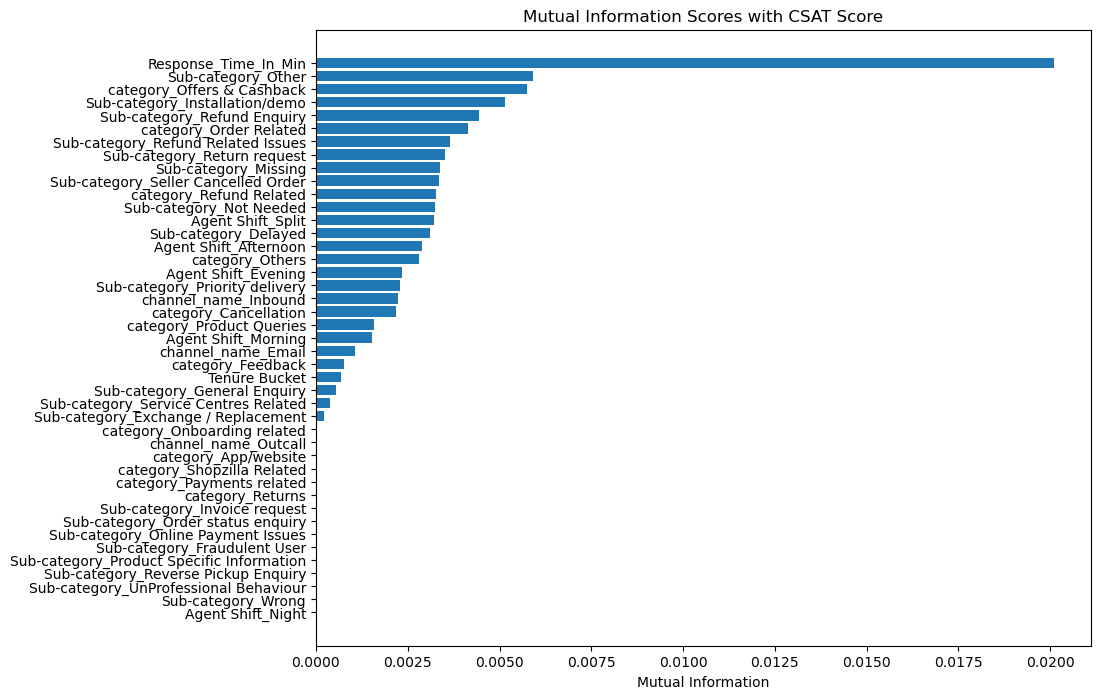

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(mi_df['Features'], mi_df['MI_Score'])
plt.gca().invert_yaxis()
plt.title("Mutual Information Scores with CSAT Score")
plt.xlabel("Mutual Information")
plt.show()


In [75]:
# selecting top 20 features
combined =  feature_scores.merge(mi_df, on  = 'Features', how ='left')
combined["AVG_Rank"] = combined[['F_Score','corr_score', 'MI_Score']].rank(ascending = False).mean(axis =1)
top_features = combined.sort_values("AVG_Rank").head(20)

In [76]:
top_features

,Features,F_Score,P_Value,corr_score,MI_Score,AVG_Rank
42,Response_Time_In_Min,3030.058753,0.000000e+00,0.187916,0.020107,1.000000
41,Sub-category_Return request,633.545954,2.838327e-139,0.087152,0.003526,4.000000
39,category_Order Related,368.316400,6.563538e-82,0.066557,0.004145,4.666667
38,Sub-category_Installation/demo,304.673022,4.187506e-68,0.060557,0.005148,4.666667
36,Sub-category_Seller Cancelled Order,222.448906,3.073250e-50,0.051770,0.003361,8.000000
34,Sub-category_Missing,192.210104,1.171691e-43,0.048132,0.003373,9.000000
35,Sub-category_Delayed,215.361102,1.070497e-48,0.050941,0.003107,10.000000
40,category_Returns,537.008019,2.015382e-118,0.080284,0.000000,14.000000
33,channel_name_Email,177.286787,2.086793e-40,0.046229,0.001068,14.333333
27,Sub-category_Not Needed,82.029604,1.368814e-19,0.031464,0.003247,14.666667


In [77]:
df = df[top_features["Features"]]
df["CSAT Score"] = y

In [78]:
y

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
85902    4.0
85903    5.0
85904    5.0
85905    4.0
85906    5.0
Name: CSAT Score, Length: 82779, dtype: float64

In [79]:
df.head(20)

,Response_Time_In_Min,Sub-category_Return request,category_Order Related,Sub-category_Installation/demo,Sub-category_Seller Cancelled Order,Sub-category_Missing,Sub-category_Delayed,category_Returns,channel_name_Email,Sub-category_Not Needed,...,Agent Shift_Split,Sub-category_Fraudulent User,Agent Shift_Morning,category_Others,Tenure Bucket,category_Cancellation,Sub-category_Wrong,Agent Shift_Evening,Sub-category_Other,CSAT Score
0,34.0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,4,False,False,False,True,5.0
1,2.0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,3,False,False,False,False,5.0
2,22.0,False,True,True,False,False,False,False,False,False,...,False,False,False,False,4,False,False,True,False,5.0
3,20.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,3,False,False,True,False,5.0
4,2.0,False,False,False,False,False,False,False,False,True,...,False,False,True,False,0,True,False,False,False,5.0
5,94.5,False,False,False,False,False,False,True,True,False,...,False,True,True,False,0,False,False,False,False,5.0
6,94.5,False,False,False,False,False,False,False,False,False,...,False,False,True,False,3,False,False,False,False,5.0
7,6.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,4,False,False,True,False,5.0
8,4.0,False,False,False,False,True,False,True,False,False,...,True,False,False,False,3,False,False,False,False,5.0
9,5.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,False,False,True,False,5.0


##### What all feature selection methods have you used  and why?

- Correlation Analysis: to identify linear relationships between numeric/encoded features and CSAT Score.

- f_regression: to statistically test linear dependence between independent variables and the continuous target (CSAT Score).

- Mutual Information: to capture non-linear dependencies missed by correlation or f_regression.

##### Which all features you found important and why?

Response_Time_In_Min: strongest impact — directly affects satisfaction.

Refund / Return / Order Related categories: core service issues influencing CSAT.

Offers & Cashback: sensitive customer concern.

Agent Shift & Delay Sub-categories: indicate performance and timing effects.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Our data has already undergone extensive preprocessing: outliers have been handled, categorical variables encoded, and numerical features scaled. Therefore, no additional transformation was required.

Reasoning:

- Scaling ensures numeric features are on comparable ranges.

- Encoding converts categorical variables into a model-readable format.

- Outlier handling prevents extreme values from skewing model performance.

### 6. Data Scaling

In [80]:
# scalling numerical columns
num_cols = ['Response_Time_In_Min', 'Tenure Bucket']
scaler = StandardScaler()
df[num_cols]= scaler.fit_transform(df[num_cols])

### 7. Dimesionality Reduction

No, dimensionality reduction is not needed in this case because the features have very low correlation (below 0.1), which means each feature carries unique information and there is little redundancy in the dataset. Applying PCA would not significantly reduce noise or simplify the data and might even cause loss of interpretability without much performance gain.Do you think that dimensionality reduction is needed? Explain Why?

### 8. Data Splitting

In [81]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop("CSAT Score", axis = 1) # features for training 
y = df["CSAT Score"] # trarget variable

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size =0.25, random_state = 42 )

##### What data splitting ratio have you used and why?

The data splitting ratio used is 60:20:20, respective of the order train:test:validation

## ***7. ML Model Implementation***

### ML Model - 1 Artificial Neural Networks(ANN)


Epoch 1/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6855 - loss: 0.9289 - val_accuracy: 0.7004 - val_loss: 0.8653
Epoch 2/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6901 - loss: 0.8926 - val_accuracy: 0.7004 - val_loss: 0.8636
Epoch 3/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6893 - loss: 0.8880 - val_accuracy: 0.7004 - val_loss: 0.8601
Epoch 4/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6891 - loss: 0.8858 - val_accuracy: 0.6996 - val_loss: 0.8609
Epoch 5/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6889 - loss: 0.8832 - val_accuracy: 0.7002 - val_loss: 0.8608
Epoch 6/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6883 - loss: 0.8819 - val_accuracy: 0.7002 - val_loss: 0.8602
Epoch 7/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6883 - loss: 0.8806 - val_accuracy: 0.6996 - val_loss: 0.8622
Epoch 8/100
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6876 - loss: 0.8798 - val_ac

D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


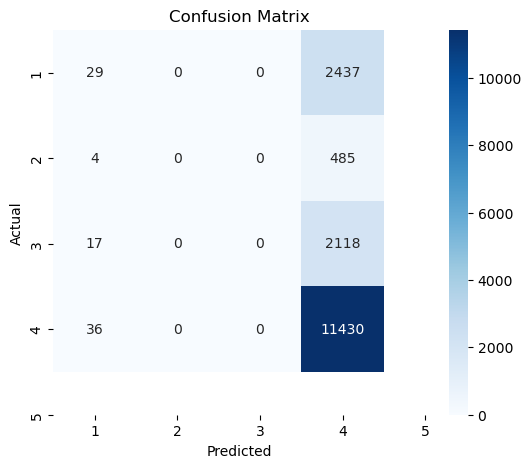

In [82]:
# ANN Model for CSAT Classification

# One-hot encoding is NOT needed since you want direct label prediction.
# Ensure y_train, y_val, y_test contain integers 1–5. We'll adjust them to 0–4 for Keras.
y_train_adj = y_train - 1
y_val_adj = y_val - 1
y_test_adj = y_test - 1

# Model architecture
model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 output neurons (classes 1–5)
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # labels are integers, not one-hot
    metrics=['accuracy']
)
print()
# Early stopping to prevent overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train, y_train_adj,
    validation_data=(x_val, y_val_adj),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_adj, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Predict class labels (convert back to 1–5)
y_pred = np.argmax(model.predict(x_test), axis=1) + 1

# Ensure y_test and y_pred are integer types
y_test_fixed = np.array(y_test).astype(int)
y_pred_fixed = np.array(y_pred).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_fixed, y_pred_fixed))

# Confusion matrix
cm = confusion_matrix(y_test_fixed, y_pred_fixed)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [83]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_adj),
    y=y_train_adj
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Improved ANN model
model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model with class weights
history = model.fit(
    x_train, y_train_adj,
    validation_data=(x_val, y_val_adj),
    epochs=25,
    batch_size=100,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_adj, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Predict class labels
y_pred = np.argmax(model.predict(x_test), axis=1) + 1
y_test_fixed = y_test.astype(int)
y_pred_fixed = y_pred.astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_fixed, y_pred_fixed))



Class weights: {0: np.float64(1.6958139852499317), 1: np.float64(8.217571144937128), 2: np.float64(1.8977151153904936), 3: np.float64(0.36209938467819547)}
Epoch 1/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6443 - loss: 0.9806 - val_accuracy: 0.6702 - val_loss: 0.9542
Epoch 2/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6471 - loss: 0.9554 - val_accuracy: 0.6702 - val_loss: 0.9471
Epoch 3/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6479 - loss: 0.9525 - val_accuracy: 0.6598 - val_loss: 0.9448
Epoch 4/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6496 - loss: 0.9499 - val_accuracy: 0.6405 - val_loss: 0.9618
Epoch 5/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6486 - loss: 0.9492 - val_accuracy: 0.6294 - val_loss: 0.9559
Epoch 6/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6487 - loss: 0.9473 - val_accuracy: 0.6341 - val_loss: 0.9523
Epoch 7/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6510 

D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Workspace\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


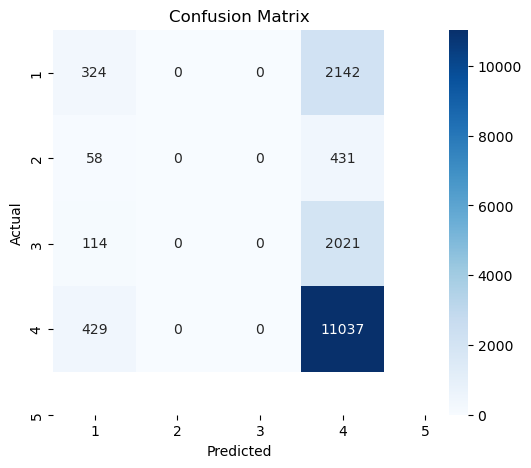

In [95]:
# Confusion matrix
cm = confusion_matrix(y_test_fixed, y_pred_fixed)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [90]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [91]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The DeepCSAT project demonstrates how Artificial Neural Networks can revolutionize customer satisfaction analysis in e-commerce. By leveraging interaction-level data and advanced modeling, the project achieves reliable CSAT score predictions that go beyond traditional feedback systems. This approach enables e-commerce businesses to proactively monitor satisfaction, identify problem areas, and optimize service quality with precision. The results highlight that deep learning-based CSAT prediction not only enhances operational efficiency but also strengthens customer retention strategies and long-term business performance.